In [2]:
import pandas as pd
#import requests
#from bs4 import BeautifulSoup

#import time

from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


from pandas import set_option
set_option("display.max_rows", 35)

LARGE_FIGSIZE = (12, 8)
style.use('ggplot')
%matplotlib inline

In [3]:
# file desc: https://www.fec.gov/campaign-finance-data/all-candidates-file-description/
sched_a_df = pd.read_csv('sched_a_2016.txt',sep='|', header=None)
sched_a_df.columns = ['CMTE_ID',
                      'AMNDT_IND',
                      'RPT_TP',
                      'TRANSACTION_PGI',
                      'IMAGE_NUM',
                      'TRANSACTION_TP',
                      'ENTITY_TP',
                      'NAME', 
                      'CITY',
                      'STATE',
                      'ZIP_CODE',
                      'EMPLOYER',
                      'OCCUPATION',
                      'TRANSACTION_DT',
                      'TRANSACTION_AMT',
                      'OTHER_ID',
                      'TRAN_ID',
                      'FILE_NUM',
                      'MEMO_CD',
                      'MEMO_TXT',
                      'SUB_ID']
                      
tmp = sched_a_df.head()
tmp

/Users/sunshine168/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,5,10,15,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TXT,SUB_ID
0,C00572537,N,MY,P,201509169002679475,15,IND,"CALLAHAN, MICHAEL",MONTREAL,ZZ,...,SELF EMPLOYED,MEDIA & COMMUNICATIONS,3312016,19450,NaN,SA11AI.5152,1024961,X,NaN,4091720151253097597
1,C00550087,A,Q3,G,201611189037214001,15,IND,"LASERSOHN, TOM",WESTPORT,CT,...,RETIRED,RETIRED,3312016,1000,NaN,SA11AI.5127,1126451,X,NaN,4111820161350974138
2,C00578013,A,YE,P,201608050200329616,15E,IND,"MANSON, CONNIE",OLYMPIA,WA,...,AMERICAN GEOLOGICAL INSTITUTE,EDITOR/INDEXER,3172016,50,C00401224,SA09151696163854,1099259,NaN,*EARMARKED CONTRIBUTION: SEE BELOW,1032020170033936395
3,C00573758,A,YE,P,201702030200053330,15E,IND,"ROWE, JOHN H",BOYNTON BEACH,FL,...,NaN,RETIRED,1292016,10,C00401224,SA02071733302049,1147915,NaN,EARMARKED CONTRIBUTION: SEE BELOW,2020820171370035701
4,C00573758,A,YE,P,201611170200661592,15E,IND,"ROWE, JOHN H",BOYNTON BEACH,FL,...,NaN,RETIRED,1292016,10,C00401224,SA11211615922043,1126576,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,1020620170033359950


In [4]:
tmp = tmp.T
tmp

,0,1,2,3,4
CMTE_ID,C00572537,C00550087,C00578013,C00573758,C00573758
AMNDT_IND,N,A,A,A,A
RPT_TP,MY,Q3,YE,YE,YE
TRANSACTION_PGI,P,G,P,P,P
IMAGE_NUM,201509169002679475,201611189037214001,201608050200329616,201702030200053330,201611170200661592
TRANSACTION_TP,15,15,15E,15E,15E
ENTITY_TP,IND,IND,IND,IND,IND
NAME,"CALLAHAN, MICHAEL","LASERSOHN, TOM","MANSON, CONNIE","ROWE, JOHN H","ROWE, JOHN H"
CITY,MONTREAL,WESTPORT,OLYMPIA,BOYNTON BEACH,BOYNTON BEACH
STATE,ZZ,CT,WA,FL,FL


In [5]:
sched_a_df.shape

(14597286, 21)

In [6]:
sched_a_df.count()

CMTE_ID            14597286
AMNDT_IND          14597286
RPT_TP             14597286
TRANSACTION_PGI    14098549
IMAGE_NUM          14597286
TRANSACTION_TP     14597286
ENTITY_TP          14591652
NAME               14595955
CITY               14590712
STATE              14571224
ZIP_CODE           14574782
EMPLOYER           12600882
OCCUPATION         13970083
TRANSACTION_DT     14597286
TRANSACTION_AMT    14597286
OTHER_ID            5900262
TRAN_ID            14597270
FILE_NUM           14597286
MEMO_CD               76561
MEMO_TXT            7441494
SUB_ID             14597286
dtype: int64

In [7]:
sched_a_df.CMTE_ID.value_counts()[:10]

C00401224    3473182
C00575795    2433232
C00577130    1252557
C00000935     629231
C00586537     432869
C00042366     285671
C00573261     273237
C00618371     245769
C00574624     236054
C00003418     169717
Name: CMTE_ID, dtype: int64

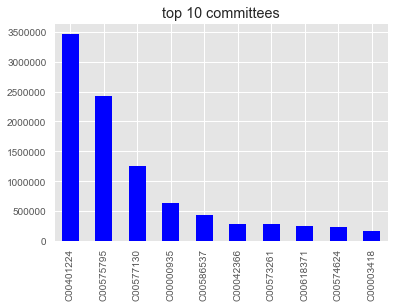

In [8]:
# top committee_ids 
sched_a_df.CMTE_ID.value_counts()[:10].plot(kind='bar', color='b', title='top 10 committees')

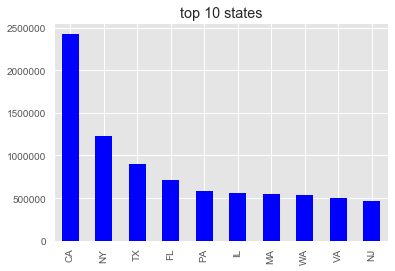

In [9]:
# top states
sched_a_df.STATE.value_counts()[:10].plot(kind='bar', color='b', title='top 10 states')

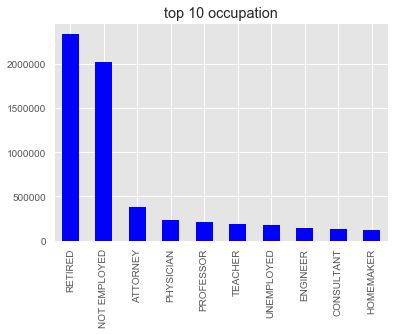

In [10]:
# top occupations
sched_a_df.OCCUPATION.value_counts()[:10].plot(kind='bar', color='b', title='top 10 occupation')

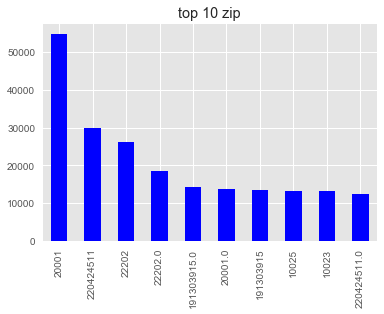

In [11]:
# top zip code
sched_a_df.ZIP_CODE.value_counts()[:10].plot(kind='bar', color='b', title='top 10 zip')

In [12]:
sched_a_df.ZIP = sched_a_df.ZIP_CODE.str[:5]
sched_a_df.ZIP[:10]

0      NaN
1    06880
2    98506
3    33437
4    33437
5    20814
6    28105
7    80503
8      NaN
9    66221
Name: ZIP_CODE, dtype: object

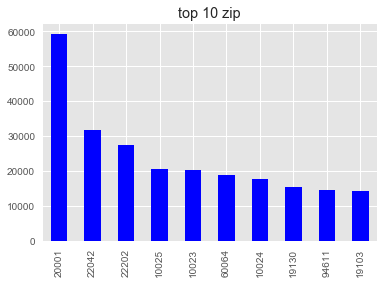

In [13]:
# top zips after cleanup
sched_a_df.ZIP.value_counts()[:10].plot(kind='bar', color='b', title='top 10 zip')

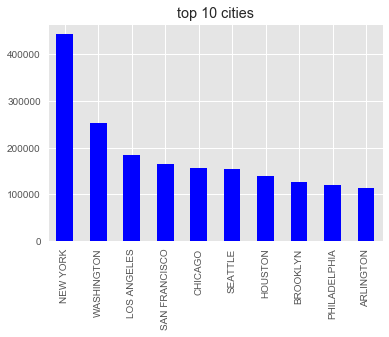

In [14]:
sched_a_df.CITY.value_counts()[:10].plot(kind='bar', color='b', title='top 10 cities')

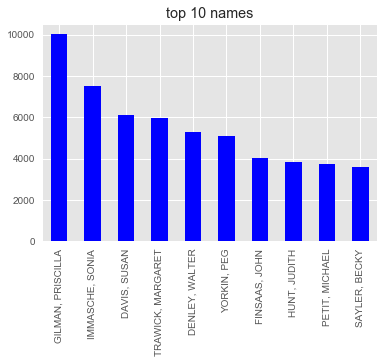

In [15]:
sched_a_df.NAME.value_counts()[:10].plot(kind='bar', color='b', title='top 10 names')

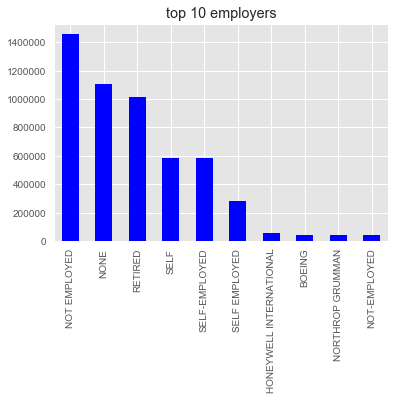

In [16]:
sched_a_df.EMPLOYER.value_counts()[:10].plot(kind='bar', color='b', title='top 10 employers')

In [17]:
sched_a_df['TRANSACTION_AMT'] = sched_a_df['TRANSACTION_AMT'].astype(int)
sched_a_df['TRANSACTION_AMT'].max()

50000000

In [18]:
sched_a_df['TRANSACTION_AMT'].min()

-200000

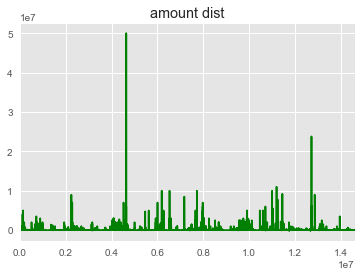

In [19]:
sched_a_df['TRANSACTION_AMT'].plot(title='amount dist', color='g')